In [4]:
%config IPCompleter.greedy=True

In [5]:
import pandas as pd

df_train = pd.read_csv('train_kaggle.csv')
df_train

,Id,Label
0,0,1
1,1,0
2,2,0
3,3,1
4,4,0
5,5,1
6,6,0
7,7,1
8,8,0
9,9,0


In [6]:
def load_dataframe(id):
    train_data = np.load("train/train/{}.npy".format(id))
    return pd.DataFrame(data=train_data)

In [7]:
def impute_missing_data_with_average(df, drop_indices, average):
    df = df.drop(drop_indices, 1)
    for col in df.columns:
        df[col] = df[col].fillna(average[col])
    return df

In [8]:
n_features = 102
n_encoded_features = 9
n_train_samples = 18662 

In [22]:
# Calculate average for each feature column and store it as npy
import sys
import numpy as np

average = np.empty(n_encoded_features)
accumulated_count = [0] * df_train.shape[0]
train_data = np.load('train_encoded.npy', allow_pickle=True)
for id in df_train['Id']:
    sys.stdout.write("\rprocessing %i" % id)
#     df = load_dataframe(id)
    train_data_for_id = train_data[id]
    for i in range(n_encoded_features):
        values = train_data_for_id[:,i]
        is_not_nan = ~np.isnan(values)
        values = values[is_not_nan]
        if len(values) == 0:
            continue
        count = len(values)
        average[i] = (average[i] * accumulated_count[i] + np.sum(values)) / (accumulated_count[i] + count)
        accumulated_count[i] += count

np.save("average", average)
average

processing 18661

array([ 1.94185460e+18,  3.36615822e+18, -3.00830039e+17,  4.48840049e+16,
        8.55738223e+18, -2.23134386e+17, -2.99450309e+17, -1.54840238e+17,
        1.38252363e+17])

Processing 18660

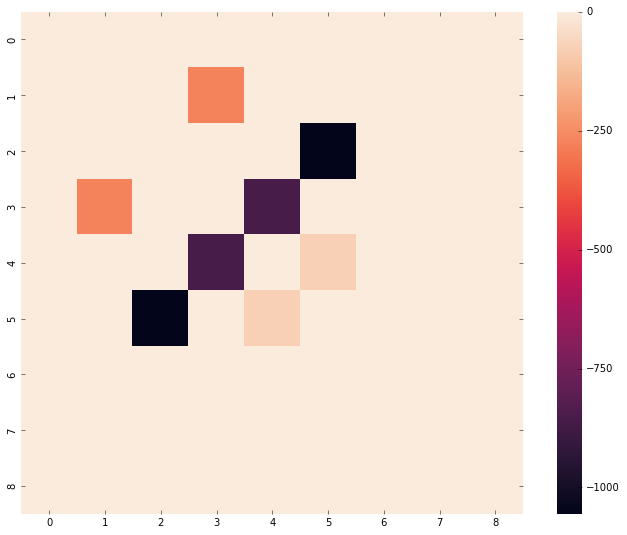

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys 

train_data = np.load('train_encoded.npy', allow_pickle=True)
combined_corrmat = np.zeros((9, 9))
for i in range(18661):
    sys.stdout.write("\rProcessing %i" % i)
    df_train = pd.DataFrame(data=train_data[i])
    corrmat = df_train.corr()
    combined_corrmat += corrmat.fillna(0)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(combined_corrmat, vmax=.8, square=True)

# 6051
# test_data = np.load('test_encoded.npy', allow_pickle=True) 


In [23]:
train_data = np.load('train_encoded.npy', allow_pickle=True)
def get_cleaned_dataframes(exclude_indices):
    dataframes = []
    empty_dfi = []

    for id in df_train['Id']:
        sys.stdout.write("\rprocessing %i" % id)
        df = pd.DataFrame(data=train_data[id])

        #remove only if given and impute some values
        dfi = impute_missing_data_with_average(df, exclude_indices, average)

        dfi['Id'] = id

        dataframes.append(dfi)
    print("\nempty dfi", empty_dfi)
    return dataframes

In [24]:
test_data = np.load('test_encoded.npy', allow_pickle=True)
df_test = pd.read_csv('sample_solution.csv')
def get_cleaned_test_dataframes(exclude_indices):
    dataframestest = []
    empty_dfi = []
    for id in df_test['Id']:
        if id % 10 == 0:
            sys.stdout.write("\rprocessing %i" % id)
        df = pd.DataFrame(data=test_data[id])

        #remove only if given and impute some values
        dfi = impute_missing_data_with_average(df, exclude_indices, average)

        dfi['Id'] = id
        dataframestest.append(dfi)
    print("\nempty dfi", empty_dfi)
    return dataframestest

In [25]:
# df_test_full = pd.concat(get_cleaned_test_dataframes([]), ignore_index=True)
# df_test_full

df_train_full = pd.concat(get_cleaned_dataframes([]), ignore_index=True)
df_train_full

processing 18661
empty dfi []


,0,1,2,3,4,5,6,7,8,Id
0,7.872746e+18,9.109495e+18,5.110561e+18,-2.994065e+17,8.952439e+18,-1.566437e+17,-2.994065e+17,-1.566437e+17,1.942008e+17,0
1,4.650052e+18,3.510831e+18,3.944556e+18,-2.994065e+17,8.952439e+18,-1.566437e+17,-2.994065e+17,-1.566437e+17,1.942008e+17,0
2,6.111350e+18,3.321631e+17,1.674830e+18,-2.994065e+17,8.952439e+18,-1.566437e+17,-2.994065e+17,-1.566437e+17,1.942008e+17,0
3,-8.270300e+18,-5.468250e+18,-2.994065e+17,-2.994065e+17,8.952439e+18,-1.566437e+17,-2.994065e+17,-1.566437e+17,1.942008e+17,0
4,3.575490e+18,3.510831e+18,-2.994065e+17,-2.994065e+17,5.859603e+18,-1.566437e+17,-2.994065e+17,-1.566437e+17,8.529840e+18,0
5,9.298310e+17,3.510831e+18,-2.994065e+17,-2.994065e+17,8.952439e+18,-1.566437e+17,-2.994065e+17,-1.566437e+17,-9.156077e+18,0
6,7.872746e+18,9.109495e+18,-1.336759e+18,-2.994065e+17,8.952439e+18,-1.566437e+17,-2.994065e+17,-1.566437e+17,1.942008e+17,0
7,3.837580e+18,9.109495e+18,2.078893e+18,-2.994065e+17,8.952439e+18,-1.566437e+17,-2.994065e+17,-1.566437e+17,1.942008e+17,0
8,7.872746e+18,9.109495e+18,5.110561e+18,-2.994065e+17,8.952439e+18,-1.566437e+17,-2.994065e+17,-1.566437e+17,1.942008e+17,0
9,7.872746e+18,9.109495e+18,5.110561e+18,-2.994065e+17,8.952439e+18,-1.566437e+17,-2.994065e+17,-1.566437e+17,1.942008e+17,0


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# to_scale = df_test_full.iloc[:,0:n_encoded_features]
# scaler = MinMaxScaler()
# scaler.fit(to_scale)

# df_test_scaled = pd.DataFrame(data=scaler.transform(to_scale), columns=[i for i in range(n_encoded_features)])
# df_test_scaled = pd.concat([df_test_scaled, df_test_full['Id']], axis=1)
# df_test_scaled

In [ ]:
# # Save extracted features for each feature column
# from tsfresh import extract_features, select_features

# all_indices = np.arange(n_encoded_features)
# for i in all_indices:
#     print("feature", i)
#     removing_indices = np.delete(all_indices, i)
#     df_test_all = df_test_scaled.drop(removing_indices, 1)
#     extracted_test_features = extract_features(df_test_all, column_id="Id", show_warnings=False)
#     print("extracted_test_features", extracted_test_features.shape)
#     extracted_test_features.to_parquet("test_feature" + i.astype(str) + ".gzip", compression="gzip")

In [26]:
from sklearn.preprocessing import MinMaxScaler

to_scale = df_train_full.iloc[:,0:n_encoded_features]
scaler = MinMaxScaler()
scaler.fit(to_scale)

df_train_scaled = pd.DataFrame(data=scaler.transform(to_scale), columns=[i for i in range(n_encoded_features)])
df_train_scaled = pd.concat([df_train_scaled, df_train_full['Id']], axis=1)
df_train_scaled

,0,1,2,3,4,5,6,7,8,Id
0,0.933283,1.000000,0.777043,0.483775,0.985367,0.491853,0.486715,0.491585,0.510528,0
1,0.756758,0.691170,0.713833,0.483775,0.985367,0.491853,0.486715,0.491585,0.510528,0
2,0.836801,0.515831,0.590790,0.483775,0.985367,0.491853,0.486715,0.491585,0.510528,0
3,0.049038,0.195872,0.483766,0.483775,0.985367,0.491853,0.486715,0.491585,0.510528,0
4,0.697898,0.691170,0.483766,0.483775,0.817677,0.491853,0.486715,0.491585,0.962409,0
5,0.552981,0.691170,0.483766,0.483775,0.985367,0.491853,0.486715,0.491585,0.003644,0
6,0.933283,1.000000,0.427531,0.483775,0.985367,0.491853,0.486715,0.491585,0.510528,0
7,0.712254,1.000000,0.612695,0.483775,0.985367,0.491853,0.486715,0.491585,0.510528,0
8,0.933283,1.000000,0.777043,0.483775,0.985367,0.491853,0.486715,0.491585,0.510528,0
9,0.933283,1.000000,0.777043,0.483775,0.985367,0.491853,0.486715,0.491585,0.510528,0


In [33]:
# Save extracted features for each feature column
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

all_indices = np.arange(n_encoded_features)[::-1]
print(all_indices)
df_train = pd.read_csv('train_kaggle.csv')
y = df_train['Label']

for i in all_indices:
    if i <= 2:
        continue
    print("feature", i)
    removing_indices = np.delete(all_indices, len(all_indices) - i - 1)
    print(removing_indices)
    df_train_all = df_train_scaled.drop(removing_indices, 1)
    print(df_train_all)
#     break
#     extracted_features = extract_features(df_train_all, column_id="Id", show_warnings=False)
#     print("extracted_features", extracted_features.shape)
#     extracted_features.to_parquet("feature" + i.astype(str) + ".gzip", compression="gzip")
#     impute(extracted_features)
#     features_filtered = select_features(extracted_features, y)
#     features_filtered.to_parquet("filtered_feature" + i.astype(str) + ".gzip", compression="gzip")

[8 7 6 5 4 3 2 1 0]
feature 8
[7 6 5 4 3 2 1 0]
                 8     Id
0         0.510528      0
1         0.510528      0
2         0.510528      0
3         0.510528      0
4         0.962409      0
5         0.003644      0
6         0.510528      0
7         0.510528      0
8         0.510528      0
9         0.510528      0
10        0.510528      0
11        0.510528      0
12        0.510528      0
13        0.510528      0
14        0.510528      0
15        0.510528      0
16        0.510528      0
17        0.510528      0
18        0.510528      0
19        0.909730      0
20        0.584613      0
21        0.922212      0
22        0.726629      0
23        0.486899      0
24        0.244419      0
25        0.244419      0
26        0.510400      0
27        0.452503      0
28        0.204622      0
29        0.584613      0
...            ...    ...
10814769  0.056840  18661
10814770  0.823741  18661
10814771  0.595566  18661
10814772  0.468724  18661
10814773  0.0519

In [12]:
from tsfresh import extract_features, select_features
import pandas as pd
import numpy as np

all_indices = np.arange(n_encoded_features)

for i in all_indices:
#     print("test feature", i)
#     removing_indices = np.delete(all_indices, i)
    features = pd.read_parquet("features/feature" + i.astype(str) + ".gzip")
    features_filtered = pd.read_parquet("filtered_features/filtered_feature" + i.astype(str) + ".gzip")
    print(features.shape, "vs", features_filtered.shape)
#     extracted_features_test = pd.read_parquet("gzip/test_feature" + i.astype(str) + ".gzip")
#     print(features_filtered.columns)
#     print(extracted_features_test.columns)
#     test_features_filtered = extracted_features_test[features_filtered.columns]
#     test_features_filtered.to_parquet("gzip/filtered_test_feature" + i.astype(str) + ".gzip", compression="gzip")

(18662, 794) vs (18662, 639)
(18662, 794) vs (18662, 650)
(18662, 794) vs (18662, 587)
(18662, 794) vs (18662, 581)
(18662, 794) vs (18662, 637)
(18662, 794) vs (18662, 644)
(18662, 794) vs (18662, 597)
(18662, 794) vs (18662, 631)
(18662, 794) vs (18662, 619)
